In [101]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

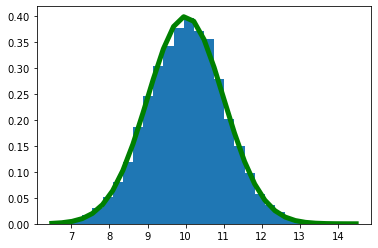

In [104]:
#Para una distribucion normal definimos una variable para el valor central(central) y otra para la desviacion (desv)
central, desv = 10, 1

#Creamos una serie de diezmil valores aleatorios por medio de distribucion normal
aleatorios = np.random.normal(central, desv, 10000)

#Guardamos los valores aleatorios en una variable de tipo lista
arreglo = aleatorios.tolist()

#Insertamos el encabezado a nuestro dataset para generar un dataframe con pandas
arreglo.insert(0,'valores')

#Guardamos la lista como un archivo txt
datos = np.asarray(arreglo)
np.savetxt("output.txt",   # Archivo de salida
           datos.T,        # Trasponemos los datos
           fmt="%s",       # Usamos números enteros
           delimiter=",")  # Para que sea un CSV de verdad

#Generamos el data set con pandas
data = pd.read_csv("output.txt")

#Definimios nuestro histograma
count, bins, ignored = plt.hist(data["valores"], 30, density=True)

# Mostramos la curva de distribucion para verificar si es una distribucion normal
plt.plot(bins, 1/(desv * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - central)**2 / (2 * desv**2) ),linewidth=5, color='g')
plt.show()

# MEDIDAS DE CENTRALIZACION

Las medidas de centralizacion son valores "intermedios" que se situan alrededor del centro de la distribucion. Entre las medidas de centralizacion tenemos:

    -Media
    -Moda
    -Mediana
    
A continuacion se explicaran cada una de estas.

## Media Aritmetica

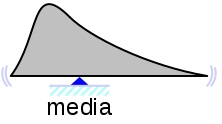

La media aritmética se define como la suma de N elementos dividida entre N. Se trata de una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.

La media aritmetica esta dada por la siguiente formula.

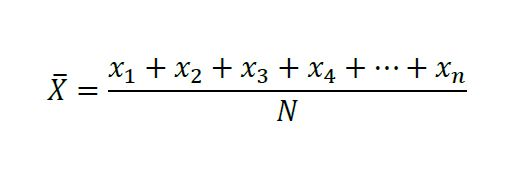

Ejemplo en python

In [114]:
media = data.mean()
print(f'La media del conjunto de datos es de {media}') 

La media del conjunto de datos es de valores    10.012708
dtype: float64


El resultado debe ser muy aproximado al valor central que definimos anteriormente (osea 10).

## Moda

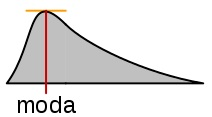

En estadística, la moda es el valor con mayor frecuencia en una de las distribuciones de datos. Esto va en forma de una columna cuando encontremos dos modas, es decir, dos datos que tengan la misma frecuencia absoluta máxima. Una distribución trimodal de los datos es en la que encontramos tres modas.

Ejemplo de moda en python.

In [115]:
moda = data['valores'].mode()
print(f'La moda del conjunto de datos es de {moda[0]}')

La moda del conjunto de datos es de 6.48457230639129


## Mediana

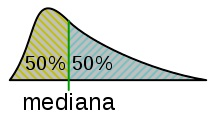

La mediana es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor.

Ejemplo de mediana en python.

In [116]:
mediana = data['valores'].median()
print(f'La mediana del conjunto de datos es de {mediana}')

La mediana del conjunto de datos es de 10.021006279658563


## Percentiles

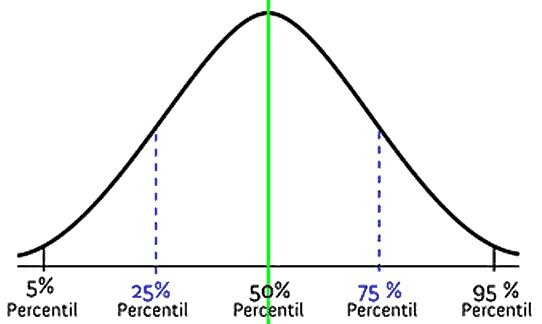

El concepto es igual al de mediana, salvo que aquí la división ya no es en el 50%. El 25% de las observaciones es menor que el primer cuartil. Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje.

Ejemplo en python.
Que valor como minimo tiene el 10%(con mayores valores) del conjunto de valores?

In [123]:
percentil = data['valores'].quantile(0.9)
print(f'El valor como minimo que tiene un 10% con valores mayores  del conjunto de valores es de: {percentil}')

El valor como minimo que tiene un 10% con valores mayores  del conjunto de valores es de: 11.292035113021587


# MEDIDAS DE DISPERSION